(sec:debugging)=
# how to debug

A significant portion of the time you spend on the problem sets in ATSC 301 will be spent debugging. In this notebook we discuss simple strategies to minimize hair loss and maximize coding pleasure. This problem is not worth any points, but we **strongly** encourage you to still go through it -- it will save you a ton of time in the future!

## Writing Readable Code

>Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.
>
>**Brian Kernighan**

The number one key to easy debugging is writing readable code. A few helpful tips:
1. Write short notes to yourself in the comments. These will help you to quickly orient yourself.
2. Use descriptive variable names. Avoid naming variables things like `a` or `foo`, as you will easily forget what they were used for.
   1. An exception to this rule is when using temporary variables (e.g., counts), which can be as short as a single character.
3. Try to write your code in a consistent style to ensure that it is predictable across problem sets. You'll thank yourself for this later!
4. Don't reinvent the wheel. Check the docs to see if a particular function exists before you spend hours trying to implement it on your own. You'd be surprised at how often this happens.

Although these tips won't save you from having to debug your code, they _will_ make the time you spend debugging much more productive.

## Debugging in the IPython Notebook
Imagine that a friend wrote you a function `plot_log` for plotting the function $\log(x)$ over the interval $[1,2]$. How sweet! Their code is below:

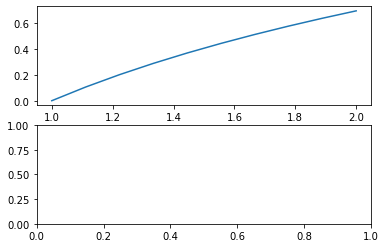

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_log():
    figure, axis = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    # axis.plot(x, np.log(x))  # wrong!
    axis[0].plot(x, np.log(x)) # right!
    plt.show()

plot_log()  # Call the function, generate plot

Unfortunately, when you go to execute the code block with the line marked "wrong" uncommented,
Python throws an error.  How can we fix the code so that it runs correctly?



### Check the traceback

The presence of a **traceback** (the multicolored text that appears when we try to run the preceding code block) is the first indication that your code isn't behaving correctly. In the current example the traceback suggests that an error is occurring at the method call `axis.plot(x, np.log(x))` on line 10. This is helpful, although somewhat baffling -- we used the same `axis.plot()` syntax in Notebook 4, and it ran fine! What's going on?

### Inspect the local variables

Inspecting the traceback gives us a general idea of where our issue is, but its output can often be fairly cryptic. A good next step is to inspect the local variables and objects defined during the execution of your code: if there's a mismatch between what the code _should_ be generating on each line and what it actually generates, you can trace it back until you've found the line containing the bug.

In the current example, we might first try inspecting the variables and objects present on the line where the traceback indicates our error is occurring. These include the `axis` object, the local variable `x`, and the method call `np.log(x)`. We can do this with IPython's `debug` magic function, or by using `print` statements. Both methods are outlined below.

**Using the Interactive Debugger**

The IPython magic function `%debug` pauses code execution upon encountering an error and drops us into an interactive debugging console. In the current example, this means that the code execution will pause just before running line 7. Once the debugger opens, we can inspect the local variables in the interactive debugger to see whether they match what we'd expect.

To invoke the debugger, just type the magic command `%debug` in a new code cell immediately after encountering the error. When you run this new cell, it will drop you into a debugger where you can investigate what went wrong:

In [2]:
# Uncomment the following line and run the cell to debug the previous function:
# %debug

<div class="alert alert-danger">
Warning: make sure you remove or comment out any <code>%debug</code> statements from your code before turning in your problem set. If you do not, then they will cause the grading scripts to break and you may not receive full credit. Always make sure you run the <code>nbgrader validate</code> commands in <a href="Submit.ipynb">Submit.ipynb</a> and ensure that they complete properly before submitting your assignment!
</div>

If you run the above code block, you should see something like this:

```
> 
      4     x = np.linspace(1, 2, 10)
----> 5     axis.plot(x, np.log(x))
      6     plt.show()
ipdb>
```
The presence of the `ipdb>` prompt at the bottom indicates that we have entered the IPython debugger. Any command you enter here will be evaluated and its output will be returned in the console. To see the stock commands available within the debugger, type `h` (short for "help") at the prompt.
```
ipdb> h
Documented commands (type help <topic>):
========================================
EOF    bt         cont      enable  jump  pdef   r        tbreak   w
a      c          continue  exit    l     pdoc   restart  u        whatis
alias  cl         d         h       list  pinfo  return   unalias  where
args   clear      debug     help    n     pp     run      unt
b      commands   disable   ignore  next  q      s        until
break  condition  down      j       p     quit   step     up

Miscellaneous help topics:
==========================
exec  pdb

Undocumented commands:
======================
retval  rv
```
For information on a particular command, you can type `h` followed by the command. For example, to see what the `c` command does, type
```
ipdb> h c
c(ont(inue))
Continue execution, only stop when a breakpoint is encountered.
```
We can use the debugger to inspect the contents of the variables and objects defined so far in our code. For example, we can inspect the contents of our `axis` object by typing `axis` at the `ipdb>` prompt:

```
ipdb> axis
array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a5e8950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x108dcf790>], dtype=object)
```

Aha! Instead of a single instance of the `matplotlib.axes` class (as we might expect), it appears that `axis` is actually an _array_ containing two separate `matplotlib.axes` instances. Why might this be? Tracing the `axis` object back to its definition on line 3, we  see that the `subplots` method is the culprit. Looking up [`subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) in the matplotlib documentation, we see that this method returns as many axis objects as there are cells in a subplot grid. In our case, since we specified a grid of size $2 \times 1$, it returned two separate axis objects inside a single array. When we asked Python to access the `plot` method of our array on line 7, it understandably got confused -- arrays don't have a `plot` method! With this in mind, we can adjust our code to resolve the issue. One solution would be ignore the second subplot entirely:

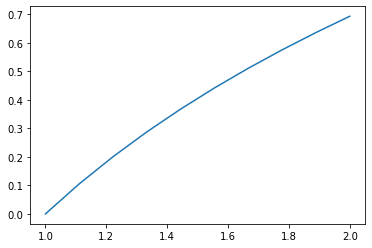

In [3]:
def plot_log():
    figure, axis = plt.subplots(1,1)
    x = np.linspace(1, 2, 10)
    axis.plot(x, np.log(x))
    plt.show()


plot_log()  # Call the function, generate plot

**Using `print` Statements**

An alternative technique for inspecting the behavior of your code is to check the values of local variables using `print` statements. The [`print`](https://docs.python.org/3/library/functions.html?highlight=print#print) command evaluates its argument and writes the result to the standard output. We could use a `print` statement to inspect the `axis` object in our `plot_log` function as follows:

[<AxesSubplot:> <AxesSubplot:>]


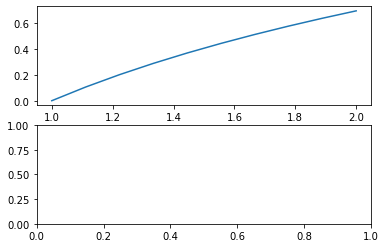

In [4]:
def plot_log():
    figure, axis = plt.subplots(2, 1)
    x = np.linspace(1, 2, 10)
    print(axis)
    axis[0].plot(x, np.log(x))
    plt.show()


plot_log()  # Call the function, generate plot

Because we placed the `print` statement in our code immediately before the error occurred, we see that IPython also printed the contents of the `axis` object above the traceback. Thus, `print` statements are an alternative means of checking the values of local variables without using the IPython debugger. Just remember to remove the `print` statements before validating your code!

## Getting Help

### Check the Docs

Although we will try to make this course as self-contained as possible, you may still need to refer to external sources while solving the homework problems. You can look up the documentation for a particular function within the IPython notebook by creating a new code block and typing the name of the function either preceded or succeeded by a `?`. For example, if you wanted to see the documentation for the matplotlib method `subplots`, you could write `?plt.subplots` (or `plt.sublots?`), which will open a pager displaying the docstring for `plt.subplots`:

In [5]:
?plt.subplots

If you'd prefer to look at the available functions in your web browser, links to the NumPy, Matplotlib, Python, and IPython Notebook online docs are below:
* Python 3: https://docs.python.org/3/genindex.html
* NumPy: http://docs.scipy.org/doc/numpy/genindex.html
* pyplot (matplotlib): http://matplotlib.org/api/pyplot_summary.html
* IPython Notebook: http://ipython.org/ipython-doc/2/notebook/index.html

### Hail Mary

If these techniques fail and you're still having trouble, the following suggestions may be of use:
1. Copy and paste your error message into Google to see if anyone else has experienced similar problems. You'd be surprised how often this works!
2. Search [StackOverflow](https://stackoverflow.com/questions/tagged/python)
3. Consult fellow classmates on piazza/ask in class